In [1]:
from sklearn import datasets

In [2]:
digits = datasets.load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
# outputting the picture value as a series of numbers
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [7]:
import matplotlib.pyplot as plt

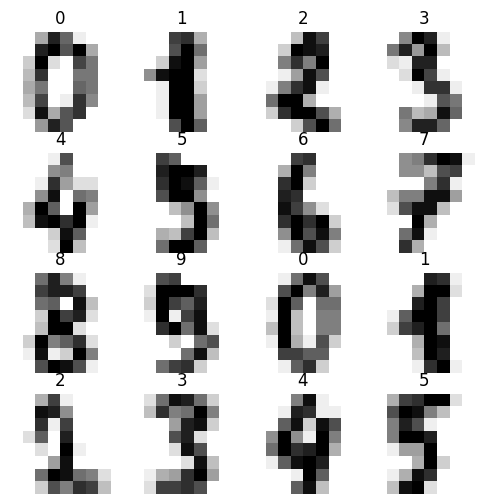

In [15]:
def plot_multi(i):
    nplots = 16
    fig = plt.figure(figsize=(6, 6))
    for j in range(nplots):
        plt.subplot(4, 4, j+1)
        plt.imshow(digits.images[i+j], cmap='binary')  # display data as an image
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

plot_multi(0)

In [16]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))

In [17]:
x.shape

(1797, 64)

In [20]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [52]:
from sklearn.model_selection import train_test_split

x = digits.data / 16.0 # normalize 
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [63]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='relu', alpha=1e-4, solver='sgd', tol=1e-4, random_state=1, learning_rate_init=.1, verbose=True)

In [55]:
mlp.fit(x_train, y_train)

Iteration 1, loss = 2.24470482
Iteration 2, loss = 1.84100538
Iteration 3, loss = 1.26428515
Iteration 4, loss = 0.78889300
Iteration 5, loss = 0.53233190
Iteration 6, loss = 0.38813701
Iteration 7, loss = 0.30322771
Iteration 8, loss = 0.26505878
Iteration 9, loss = 0.22570649
Iteration 10, loss = 0.19751522
Iteration 11, loss = 0.17541063
Iteration 12, loss = 0.16287971
Iteration 13, loss = 0.14768026
Iteration 14, loss = 0.13865767
Iteration 15, loss = 0.12937407
Iteration 16, loss = 0.12081922
Iteration 17, loss = 0.11782541
Iteration 18, loss = 0.11044389
Iteration 19, loss = 0.10487282
Iteration 20, loss = 0.10233828
Iteration 21, loss = 0.09853969
Iteration 22, loss = 0.09042570
Iteration 23, loss = 0.08409376
Iteration 24, loss = 0.08216073
Iteration 25, loss = 0.08012848
Iteration 26, loss = 0.07596764
Iteration 27, loss = 0.07321287
Iteration 28, loss = 0.07102507
Iteration 29, loss = 0.06789131
Iteration 30, loss = 0.06464617
Iteration 31, loss = 0.06291382
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(15,), learning_rate_init=0.1, random_state=1,
              solver='sgd', verbose=True)

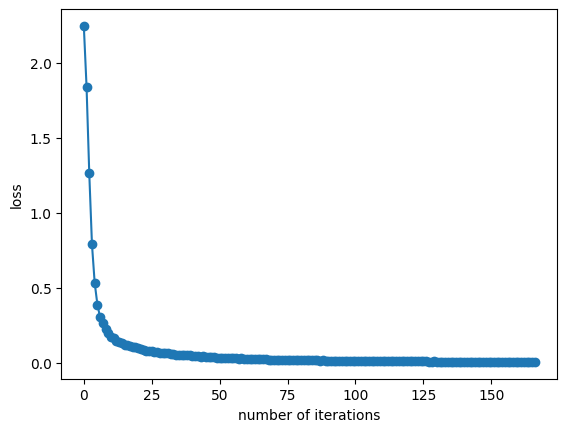

In [56]:
fig, axes = plt.subplots(1, 1)
axes.plot(mlp.loss_curve_, 'o-')
axes.set_xlabel('number of iterations')
axes.set_ylabel('loss')
plt.show()

In [57]:
# model evaluation
predictions = mlp.predict(x_test)
predictions[:50]

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5])

In [58]:
y_test[:50]

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5])

In [59]:
# accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
accuracy_score(y_test, predictions)

0.9740740740740741

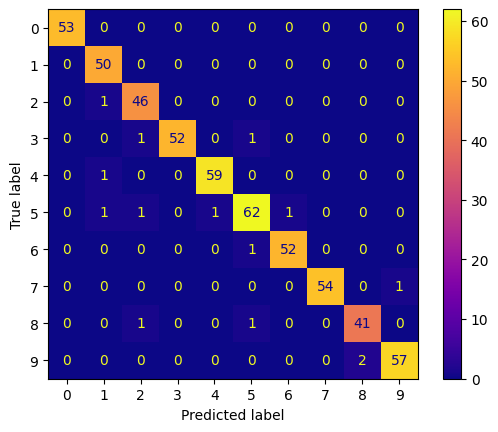

In [60]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.plasma) 
plt.show()

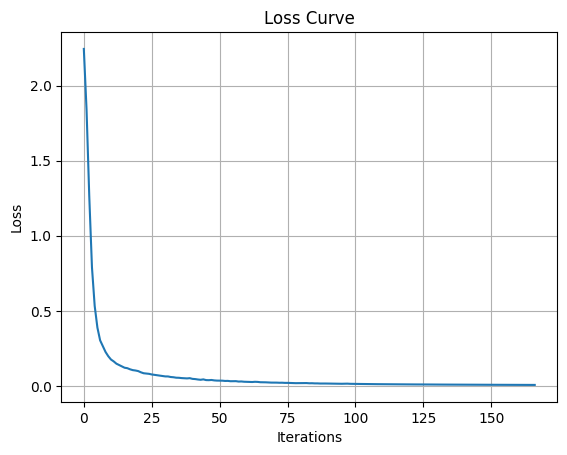

In [61]:
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

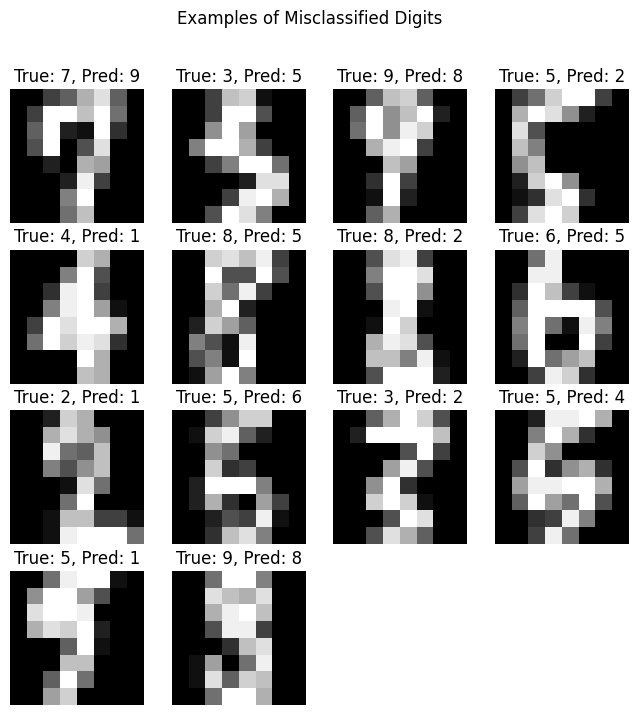

In [62]:
import numpy as np

misclassified = np.where(predictions != y_test)[0]

plt.figure(figsize=(8, 8))
for i, idx in enumerate(misclassified[:16]):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[idx].reshape(8, 8) * 16, cmap='gray')  # un-normalize
    plt.title(f"True: {y_test[idx]}, Pred: {predictions[idx]}")
    plt.axis('off')
plt.suptitle("Examples of Misclassified Digits")
plt.show()
